In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import lsq_linear

# Detecting the resonance off

$\sigma(\omega)=\left( 1+i\omega\tau \right)^{-1}$

In [2]:
class SuperOscillationsResonance:
    
    def __init__(self, omega_measurements, tau1, tau2):
        """
        tau -- resonance width
        """
        # saving parameters
        self.tau1 = tau1
        self.tau2 = tau2
        self.omega_measurements = omega_measurements[np.newaxis, :]
        
        # generating time grids
        self.short_half_period = np.pi / np.abs(self.omega_measurements).max()
        self.short_time = np.linspace(-self.short_half_period, self.short_half_period, 100)[:, np.newaxis]
        
        long_half_period = np.pi / np.abs(self.omega_measurements).min()
        self.long_time = np.linspace(-long_half_period, long_half_period, 100)[:, np.newaxis]
        
        
        sigma1 = self.sigma(self.omega_measurements, self.tau1)
        self.phase_sigma1 = np.angle(sigma1)
        self.ampl_sigma1 = np.abs(sigma1)
        
        sigma2 = self.sigma(self.omega_measurements, self.tau2)
        self.phase_sigma2 = np.angle(sigma2)
        self.ampl_sigma2 = np.abs(sigma2)
        
        ############################################################################################################
        #
        #  Fit
        #
        ############################################################################################################
        
        self.fit_results = lsq_linear(
            self.freq2time_matrix_sigma1(self.short_time),
            self.peaked_function(self.short_time).reshape(-1)
        )

        # Values of the optimal amplitudes
        self.opt_ampl = self.fit_results['x'].reshape(self.omega_measurements.shape)
        
    def short_time_sigma2(self):
        return np.sum(
            self.opt_ampl * self.freq2time_matrix_sigma2(self.short_time), axis=1
        )
    
    def long_time_sigma2(self):
        return np.sum(
            self.opt_ampl * self.freq2time_matrix_sigma2(self.long_time), axis=1
        )
    
    def short_time_sigma1(self):
        return np.sum(
            self.opt_ampl * self.freq2time_matrix_sigma1(self.short_time), axis=1
        )
    
    def long_time_sigma1(self):
        return np.sum(
            self.opt_ampl * self.freq2time_matrix_sigma1(self.long_time), axis=1
        )
    
    def freq2time_matrix_sigma2(self, t):
        return self.ampl_sigma2 * np.cos(self.omega_measurements * t + self.phase_sigma2 - self.phase_sigma1)
    
    def freq2time_matrix_sigma1(self, t):
        return self.ampl_sigma1 * np.cos(self.omega_measurements * t)
        
    def peaked_function(self, t):
        # Narrow function to approximate to
        return np.exp(-(10 * t / self.short_half_period) ** 2)
                
    @classmethod
    def sigma(cls, omega, tau):
        """
        Drude resonans
        """
        return 1. / (1. + 1j * omega * tau)

In [3]:
res = SuperOscillationsResonance(np.linspace(-80, -40, 5), tau1=0.1, tau2=0.102)


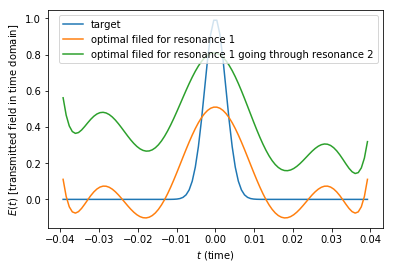

In [4]:
plt.plot(res.short_time, res.peaked_function(res.short_time), label='target')
plt.plot(res.short_time, res.short_time_sigma1(), label='optimal filed for resonance 1')
plt.plot(res.short_time, res.short_time_sigma2(), label='optimal filed for resonance 1 going through resonance 2')
plt.ylabel('$E(t)$ [transmitted field in time domain]')
plt.xlabel('$t$ (time)')
plt.legend()
plt.show()

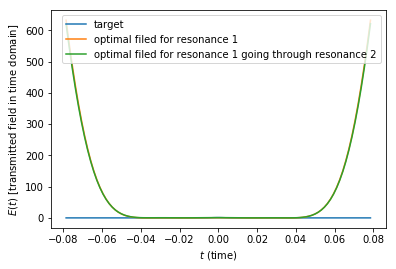

In [5]:
plt.plot(res.long_time, res.peaked_function(res.long_time), label='target')
plt.plot(res.long_time, res.long_time_sigma1(), label='optimal filed for resonance 1')
plt.plot(res.long_time, res.long_time_sigma2(), label='optimal filed for resonance 1 going through resonance 2')
plt.ylabel('$E(t)$ [transmitted field in time domain]')
plt.xlabel('$t$ (time)')
plt.legend()
plt.show()